In [15]:
import datetime as dt
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# looking at the impact of expense ratio on investment returns

glossary: <br>
- expense ratios: the management fee that is paid to the fund management company to manage the invesments. <br>
    https://www.investopedia.com/terms/e/expenseratio.asp
- basis points: 1/100th of a percent so 3bps is .03% 

In [5]:
start = dt.datetime(1990,1,1)
end = dt.datetime(2022,12,30)

#Total return of S&P500 index without expense ratio
SP500TR_prices = yf.download(['^SP500TR'], start=start, end=end)['Adj Close']
SP500TR_returns = SP500TR_prices.pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [22]:
#expense ratios below broadly different cost levels
#  1. cheapest SP500 index fund, 
#  2. index fund on non-us index or factor fund, 
#  3. target date fund or managed account
#  4. somewhat actively managed products or a systematic product with complex implimentation (levered products, simple implimentation systematic futures trading, volatility products)
#  5. complex systematic or actively products 
expense_ratios = [.0003,.0012,.0035,.01,.02]

In [23]:
#subtract expense ratio from fund NAV daily
SP500_rtns_expense = {}
for expense_ratio in expense_ratios:
    temp = pd.DataFrame(SP500TR_returns).copy(deep=True)
    rtns_w_day_count = (temp.merge(SP500TR_returns.index.year.value_counts().rename('day_count'),
                                   left_on=temp.index.year, right_index=True).rename(columns={"Adj Close":'returns', 'key_0':'year'}))
    rtns_w_day_count['expense_ratio'] = expense_ratio
    rtns_w_day_count['expense_adjusted_'+str(expense_ratio)] = rtns_w_day_count['returns'] - rtns_w_day_count['expense_ratio']/rtns_w_day_count['day_count']
    SP500_rtns_expense[expense_ratio] = rtns_w_day_count 

In [24]:
#merge expense columns back into dataframe of original returns
SP500_expense_comparison = SP500_rtns_expense[expense_ratio][['returns']]
for expense_ratio in expense_ratios:
    SP500_expense_comparison = SP500_expense_comparison.merge(SP500_rtns_expense[expense_ratio]['expense_adjusted_'+str(expense_ratio)], left_index=True, right_index=True)

<Axes: xlabel='Date'>

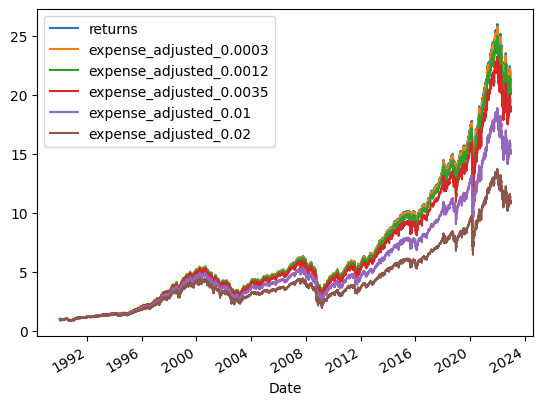

In [25]:
(SP500_expense_comparison+1).cumprod().plot()

In [26]:
final_wealth = (SP500_expense_comparison+1).cumprod()[-1:]
final_wealth

,returns,expense_adjusted_0.0003,expense_adjusted_0.0012,expense_adjusted_0.0035,expense_adjusted_0.01,expense_adjusted_0.02
Date,,,,,,
2022-12-29,21.230475,21.021393,20.406418,18.915307,15.264504,10.974886


In [27]:
(final_wealth.iloc[:,1:]/final_wealth['returns'].values[0]*100).round(2).astype(str)+'%'

,expense_adjusted_0.0003,expense_adjusted_0.0012,expense_adjusted_0.0035,expense_adjusted_0.01,expense_adjusted_0.02
Date,,,,,
2022-12-29,99.02%,96.12%,89.1%,71.9%,51.69%


# Takeaways:
- For you basic index fund with an expense ratio of around 10bps or less you are recieving 95%+ of the total return of the underlying asset
- For your standard robo advisor or target date fund which will charge 25bps to automatically distribute money to underlying funds which themselves have expense ratios of around 10 bps creating a 35 bps total expense ratio to the investor they are recieving ~90% of the total return of the underlying asset
- Expense ratios do not scale linearly with repect to the total return of the end investor, with a 1% (2%) expense ratio the investor only recieves ~70% (~50%) of the total return of the underlying asset